# **Setting**

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
cd/content/gdrive/My Drive/Current_Study/comp9444_NN&DeepLearning/Final_Submission/Sub_Folder/

/content/gdrive/My Drive/Current_Study/comp9444_NN&DeepLearning/Final_Submission/Sub_Folder


In [7]:
ls

datapreprocessing_with_2classes.ipynb  overall100k.csv


In [ ]:
import pandas as pd 
import random
from sklearn.model_selection import train_test_split

import squarify
import matplotlib.pyplot as plt



import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import re
import spacy

from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import string
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import mean_squared_error

import time

from collections import Counter
import re
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

# # spacy: NLP library
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_sm')

# **Load the Dataset**

In [ ]:
data = pd.read_csv('overall100k.csv') #100000 data
data = data.iloc[:,1:] #drop Id column
data

,Ratings,Titles,Text
0,4,Designing a database : get this book!,Easy to read and communicates years of db theo...
1,5,Micro-who?,I've been a Windows user since version 1.0 in ...
2,2,Couldn't even finish,I was so disappointed when I started to read t...
3,5,Real People Making Life and Adventure Happen!!!,"Creating a fact-based adventure book, filled w..."
4,4,For those occasions when the Berlitz vocabular...,"Entertaining, raunchy and informative. This bo..."
...,...,...,...
99995,2,Frustrating rack,Very disappointing. More frustrating than the ...
99996,4,Cute Book,"The book was very cute, fast read, but I was e..."
99997,3,Frida keychain,its a very nice thing to own if you as big of ...
99998,1,Total rubbish,"This film really is rubbish, its dull, the act..."


# **Change the number of classes**
Ratings 1 and 2 become negative
Rating 3 become neutral
Rating 4 and 5 become positive

In [ ]:
conditions = [
    (data['Ratings'] == 1) | (data['Ratings'] == 2),
    (data['Ratings'] == 3),
    (data['Ratings'] == 4) | (data['Ratings'] == 5)
]

#vals = [0,1,2]
vals = ['negative','neutral','positive']

data['sentiment'] = np.select(conditions, vals)

In [ ]:
data = data.loc[:,['Titles','Text','sentiment']] #use only Titles, Text, sentiment columns

# **Split the dataset Train: 80000, test:20000**

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=4) # each data does not duplicate
print(f'train length: {len(train)}')
print(f'test length: {len(test)}')

train length: 80000
test length: 20000


# **Balance the Class**

In [ ]:
train1 = train[train['sentiment']=='negative']
train3 = train[train['sentiment']=='positive']

test1 = test[test['sentiment']=='negative']
test3 = test[test['sentiment']=='positive']

In [ ]:
print("train")
print(len(train1))
print(len(train3))

print("\n test")
print(len(test1))
print(len(test3))

train
32129
31902

 test
8051
7889


In [ ]:
random_train1 = train1.sample(31000)
random_train3 = train3.sample(31000)

random_test1 = test1.sample(7800)
random_test3 = test3.sample(7800)

In [ ]:
train_combine = pd.concat([random_train1, random_train3], axis = 0, sort=False)
test_combine = pd.concat([random_test1,  random_test3], axis = 0, sort=False) 

In [ ]:
train_combine = train_combine.reset_index(drop=True)
test_combine = test_combine.reset_index(drop=True)

In [ ]:
train_combine

,Titles,Text,sentiment
0,Sickening cowardice and narcissism,Why books like this continue to get published ...,negative
1,a company you want to stay away from!!!,my statement above are based on bitter experie...,negative
2,This CD is painful to listen to nowadays.,"Maybe I'm getting old now, but it seems beyond...",negative
3,Simply Bad: great idea for a show but hard to ...,"Ming has a good idea: Take one basic ""master r...",negative
4,Pfaltzgraff cover set,"I have a gas stove, and there was no mention o...",negative
...,...,...,...
61995,Eternal Truth,"These reflective,honest and wholly recitable p...",positive
61996,Also the funniest damn book I've read!,Howard proves himself again in this book. He s...,positive
61997,The Gathering DVD,Video quality is for the most part good...Chap...,positive
61998,He Got Game Score,This is a awesome soundtrack it is fun and enj...,positive


In [ ]:
test_combine

,Titles,Text,sentiment
0,Composition 1,"This is book is not terrible, but I was quite ...",negative
1,Not a fan,This is the most annoying work out dvd I have ...,negative
2,Gruner can't save this one,"After watching this movie, I felt a bit cheate...",negative
3,Wrong Language,"Normally, this CD would deserve 3 stars, excep...",negative
4,Smells good...,"I thought this product was great at first, it ...",negative
...,...,...,...
15595,Great book for Eastern Birds,This has been a great book for Eastern USA bir...,positive
15596,Lots of ideas to consider,The do-ahead tips really help when trying to p...,positive
15597,Exciting!!!!!!!!!!!!!!!11,This book had different stories and people. It...,positive
15598,Better than I expected,"Well built, solid blade and handle. I am very ...",positive


In [ ]:
train_combine.sentiment.value_counts()

negative    31000
positive    31000
Name: sentiment, dtype: int64

In [ ]:
test_combine.sentiment.value_counts()

negative    7800
positive    7800
Name: sentiment, dtype: int64

In [ ]:
tr = train_combine 
ts = test_combine

# **Data Cleaning**

# Lematisation
we decide to do lematisation rather than stemming

In [ ]:
# lemmatizer 
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
# %time
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

tr["Titles"] = tr["Titles"].apply(lambda text: lemmatize_words(text))
tr["Text"] = tr["Text"].apply(lambda text: lemmatize_words(text))

ts["Titles"] = ts["Titles"].apply(lambda text: lemmatize_words(text))
ts["Text"] = ts["Text"].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# Remove Noise

In [ ]:
def remove_noise(text):

#Noise Removal
  # remove html markup
  text=re.sub("(<.*?>)",'',text)

  # remove url and tags! 
  text=re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , text)

  # remove emails
  text = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', text)

  # remove - : this was our top20 words so we must remove this expression as it's unnecessary
  text = re.sub(r'-', '', text)

  # Remove everything except lower/upper letter, numbers, space
  text=re.sub(r"[^a-zA-Z0-9 ]", '', text)
  
  #remove double space
  text=re.sub(r'\s+',' ',text)

  #remove all the leading and trailing spaces 
  text=text.strip() 

  return text

In [ ]:
tr['Titles']=tr['Titles'].apply(remove_noise)
tr['Text']=tr['Text'].apply(remove_noise)

ts['Titles']=ts['Titles'].apply(remove_noise)
ts['Text']=ts['Text'].apply(remove_noise)

### wordcount function

In [ ]:
def word_count(docs):

    # counter
    word_counts = Counter()

    # +1
    word_in_docs = Counter()

    # number of docs
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # Word Ranking
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # Ratio of words in corpus
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # word in docs percent
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

# Tokenize

In [ ]:
def tokenize(text):
  #make lower-letter and split
  tokens = text.lower().split()
  return tokens

In [ ]:
tr['Title_tokens'] = tr['Titles'].apply(tokenize)
tr['Text_tokens'] = tr['Text'].apply(tokenize)

ts['Title_tokens'] = ts['Titles'].apply(tokenize)
ts['Text_tokens'] = ts['Text'].apply(tokenize)

In [ ]:
tr

,Titles,Text,sentiment,Title_tokens,Text_tokens
0,Sickening cowardice and narcissism,Why book like this continue to get published i...,negative,"[sickening, cowardice, and, narcissism]","[why, book, like, this, continue, to, get, pub..."
1,a company you want to stay away from,my statement above are based on bitter experie...,negative,"[a, company, you, want, to, stay, away, from]","[my, statement, above, are, based, on, bitter,..."
2,This CD is painful to listen to nowadays,Maybe Im getting old now but it seems beyond m...,negative,"[this, cd, is, painful, to, listen, to, nowadays]","[maybe, im, getting, old, now, but, it, seems,..."
3,Simply Bad great idea for a show but hard to w...,Ming ha a good idea Take one basic master reci...,negative,"[simply, bad, great, idea, for, a, show, but, ...","[ming, ha, a, good, idea, take, one, basic, ma..."
4,Pfaltzgraff cover set,I have a gas stove and there wa no mention of ...,negative,"[pfaltzgraff, cover, set]","[i, have, a, gas, stove, and, there, wa, no, m..."
...,...,...,...,...,...
61995,Eternal Truth,These reflectivehonest and wholly recitable po...,positive,"[eternal, truth]","[these, reflectivehonest, and, wholly, recitab..."
61996,Also the funniest damn book Ive read,Howard prof himself again in this book He show...,positive,"[also, the, funniest, damn, book, ive, read]","[howard, prof, himself, again, in, this, book,..."
61997,The Gathering DVD,Video quality is for the most part goodChapter...,positive,"[the, gathering, dvd]","[video, quality, is, for, the, most, part, goo..."
61998,He Got Game Score,This is a awesome soundtrack it is fun and enj...,positive,"[he, got, game, score]","[this, is, a, awesome, soundtrack, it, is, fun..."


# Before Removing StopWords
As you can see below out top frequency words include many stopwords.

This implies that we need to remove the stopwords

In [ ]:
title_word_counts = Counter()
tr['Title_tokens'].apply(lambda x: title_word_counts.update(x))
#Top 10 words
title_word_counts.most_common(10)

[('a', 8493),
 ('the', 8438),
 ('not', 5458),
 ('great', 4781),
 ('of', 4468),
 ('for', 4440),
 ('good', 3970),
 ('this', 3570),
 ('it', 3483),
 ('and', 3426)]

In [ ]:
text_word_counts = Counter()
tr['Text_tokens'].apply(lambda x: text_word_counts.update(x))
text_word_counts.most_common(10)

[('the', 241194),
 ('a', 142842),
 ('and', 128460),
 ('i', 122369),
 ('to', 116625),
 ('it', 99070),
 ('of', 94207),
 ('this', 85068),
 ('is', 83592),
 ('in', 55617)]

In [ ]:
wc_text_org = word_count(tr['Text_tokens'])
#wc_text_org.head()

wc_title_org = word_count(tr['Title_tokens'])
#wc_title_org.head()

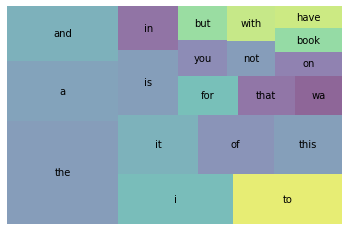

In [ ]:
#Text column
import squarify
import matplotlib.pyplot as plt

color=['viridis']

orgtext_top20 = wc_text_org[wc_text_org['rank'] <= 20]
squarify.plot(sizes=orgtext_top20['percent'], label=orgtext_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

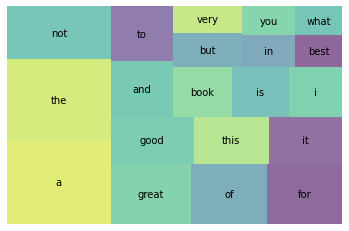

In [ ]:
#Title column
color=['viridis']

orgtitle_top20 = wc_title_org[wc_title_org['rank'] <= 20]
squarify.plot(sizes=orgtitle_top20['percent'], label=orgtitle_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

# After Removing Stopwords

## Extending Stopwords + change default stopwords

In [ ]:
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [ ]:
nlp.Defaults.stop_words -= {
  'no',
  'none',
  'nor',
  'not',
  'nothing',
  "n't",
  "n‘t",
  "n’t",
  'nt'
  "never"
}


STOP_WORDS = nlp.Defaults.stop_words.union(["im","cd", 'book', "product", 'story','movie','album','song','wa','ha','doe','way',
                                            'year','thing','review','character','i','do','ve','did','s','does','dvd','month','d',
                                            'u','is','amazon','plot','actually','page','version','going','day','set','end','music','sound',
                                            'found','read','find','series','life','author','ca','picture','band','track','ive','people','reading','come',
                                            "i'm","it's",'-','it.']) 

In [ ]:
#STOP_WORDS 

## Title

In [ ]:
tokens = []

for doc in tokenizer.pipe(tr['Titles']):
    doc_tokens = []
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
tr['tk2_title'] = tokens


In [ ]:
tokens = []

for doc in tokenizer.pipe(ts['Titles']):
    doc_tokens = []
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
ts['tk2_title'] = tokens

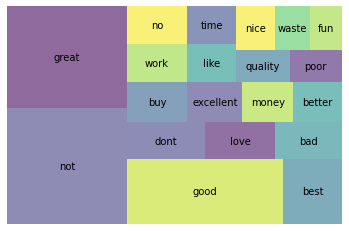

In [ ]:
wc2_title = word_count(tr['tk2_title'])
wc2_title_top20 = wc2_title[wc2_title['rank'] <= 20]

squarify.plot(sizes=wc2_title_top20['percent'], label=wc2_title_top20['word'], alpha=0.6)
plt.axis('off')
plt.show() 

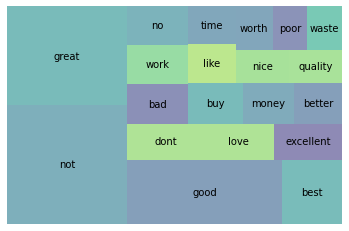

In [ ]:
wc2_title_test = word_count(ts['tk2_title'])
wc2_title_top20_test = wc2_title_test[wc2_title_test['rank'] <= 20]

squarify.plot(sizes=wc2_title_top20_test['percent'], label=wc2_title_top20_test['word'], alpha=0.6)
plt.axis('off')
plt.show() 

## Text

In [ ]:
tokens = []

for doc in tokenizer.pipe(tr['Text']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
tr['tk2_text'] = tokens

In [ ]:
tokens = []

for doc in tokenizer.pipe(ts['Text']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
ts['tk2_text'] = tokens

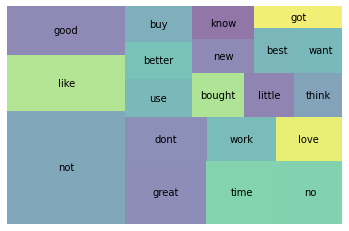

In [ ]:
wc2_text = word_count(tr['tk2_text'])
wc2_text_top20 = wc2_text[wc2_text['rank'] <= 20]

squarify.plot(sizes=wc2_text_top20['percent'], label=wc2_text_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

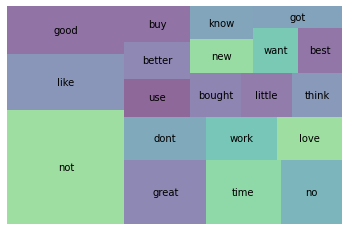

In [ ]:
wc2_text_test = word_count(ts['tk2_text'])
wc2_text_top20_test = wc2_text_test[wc2_text_test['rank'] <= 20]

squarify.plot(sizes=wc2_text_top20_test['percent'], label=wc2_text_top20_test['word'], alpha=0.6)
plt.axis('off')
plt.show()

# Trimming

## Title

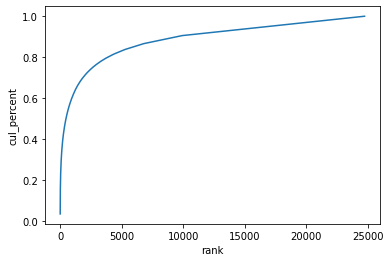

In [ ]:
sns.lineplot(x='rank', y='cul_percent', data=wc2_title);

In [ ]:
wc2_title.loc[:,['word']]

,word
60,not
13,great
47,good
282,best
53,dont
...,...
24741,hometown
24742,railroading
24743,hogarth
24744,dealall


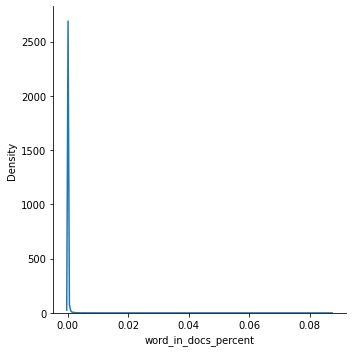

In [ ]:
# 문서에 나타나는 빈도
sns.displot(wc2_title['word_in_docs_percent'],kind='kde');

In [ ]:
wc2_title[wc2_title['word_in_docs_percent'] < 0.00022]

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
4549,chip,13,16,1463.0,0.000102,0.666388,0.000210
1526,ho,11,14,1603.0,0.000089,0.679796,0.000177
1728,fluff,11,14,1607.0,0.000089,0.680153,0.000177
4084,stale,11,14,1637.0,0.000089,0.682830,0.000177
4655,kiss,13,14,1648.0,0.000089,0.683811,0.000210
...,...,...,...,...,...,...,...
24741,hometown,1,1,24742.0,0.000006,0.999975,0.000016
24742,railroading,1,1,24743.0,0.000006,0.999981,0.000016
24743,hogarth,1,1,24744.0,0.000006,0.999987,0.000016
24744,dealall,1,1,24745.0,0.000006,0.999994,0.000016


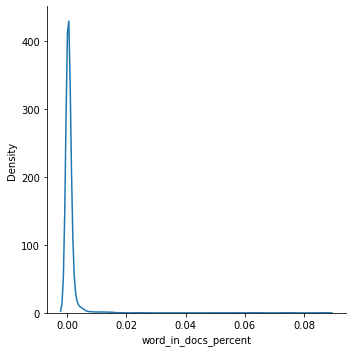

In [ ]:
# we choose words with at least 0.0002 docs percent 
cp_wc2_title = wc2_title
wc2_title = wc2_title[wc2_title['word_in_docs_percent'] >= 0.0002]

sns.displot(wc2_title['word_in_docs_percent'], kind='kde');

In [ ]:
title_list = (wc2_title['word'].values).tolist()

In [ ]:
# if tk2_title include the words, we append that words
tokens=[]
for ind in tr.index:
  doc_tokens = []
  text=tr['tk2_title'][ind]
  for word in title_list:
      if word in text:
        doc_tokens.append(word)
  tokens.append(doc_tokens)
tr['tk3_title']=tokens

In [ ]:
# test data set
# if tk2_text include the words, we append that words
wc2_title_test = wc2_title_test[wc2_title_test['word_in_docs_percent'] >= 0.005]
title_list_test = (wc2_title_test['word'].values).tolist()

tokens=[]
for ind in ts.index:
  doc_tokens = []
  text=ts['tk2_title'][ind]
  for word in title_list_test:
      if word in text:
        doc_tokens.append(word)
  tokens.append(doc_tokens)
  
ts['tk3_title']=tokens

# Text

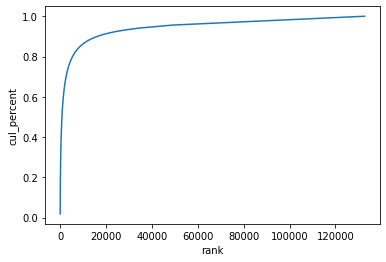

In [ ]:
sns.lineplot(x='rank', y='cul_percent', data=wc2_text);

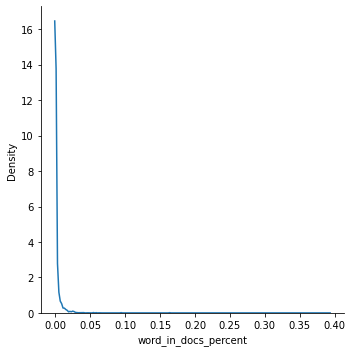

In [ ]:
# word in docs percent
sns.displot(wc2_text['word_in_docs_percent'],kind='kde');

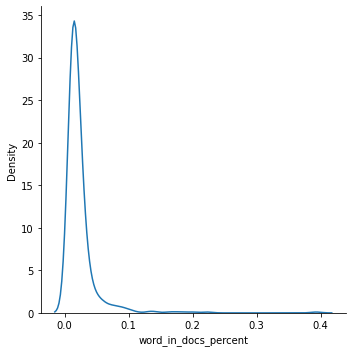

In [ ]:
# we choose words with at least 0.009 docs percent 
#we can increase the value later if we want to decrease the length
cp_wc2_text = wc2_text
wc2_text = wc2_text[wc2_text['word_in_docs_percent'] >= 0.009]

sns.displot(wc2_text['word_in_docs_percent'], kind='kde');

In [ ]:
wc2_text['word'].values

text_list = (wc2_text['word'].values).tolist()

In [ ]:
# Train
# if tk2_text include the words, we append that words
tokens=[]
for ind in tr.index:
  doc_tokens = []
  text=tr['tk2_text'][ind]
  for word in text_list:
      if word in text:
        doc_tokens.append(word)
  tokens.append(doc_tokens)
      
tr['tk3_text']=tokens

In [ ]:
# Test
# if tk2_text include the words, we append that words
wc2_text_test = wc2_text_test[wc2_text_test['word_in_docs_percent'] >= 0.005]
text_list_test = (wc2_text_test['word'].values).tolist()
tokens=[]
for ind in ts.index:
  doc_tokens = []
  text=ts['tk2_text'][ind]
  for word in text_list_test:
      if word in text:
        doc_tokens.append(word)
  tokens.append(doc_tokens)
      
ts['tk3_text']=tokens

# Download the data 

In [ ]:
cd ./data2

/content/gdrive/MyDrive/Current_Study/comp9444_NN&DeepLearning/Group_Project/final_data_preprocessing/data2


In [ ]:
tr = tr.loc[:, ['sentiment','Titles','tk2_title','tk3_title','Text','tk2_text','tk3_text']]
ts = ts.loc[:, ['sentiment','Titles','tk2_title','tk3_title','Text','tk2_text','tk3_text']]

tr.to_csv('org_train2.csv',encoding='utf-8')
ts.to_csv('org_test2.csv',encoding='utf-8')

In [ ]:
org_train2= pd.read_csv('org_train2.csv')
org_test2 = pd.read_csv('org_test2.csv')

#train data cleaning
org_train2['tk2_title'] = org_train2['tk2_title'].replace(to_replace="('|\[|\])", regex=True, value='')
org_train2['tk2_title'] = org_train2['tk2_title'].replace(to_replace=",", regex=True, value=' ')
org_train2['tk2_text'] = org_train2['tk2_text'].replace(to_replace="('|\[|\])", regex=True, value='')
org_train2['tk2_text'] = org_train2['tk2_text'].replace(to_replace=",", regex=True, value=' ')

org_train2['tk3_title'] = org_train2['tk3_title'].replace(to_replace="('|\[|\])", regex=True, value='')
org_train2['tk3_title'] = org_train2['tk3_title'].replace(to_replace=",", regex=True, value=' ')
org_train2['tk3_text'] = org_train2['tk3_text'].replace(to_replace="('|\[|\])", regex=True, value='')
org_train2['tk3_text'] = org_train2['tk3_text'].replace(to_replace=",", regex=True, value=' ')

#test data cleaning
org_test2['tk2_title'] = org_test2['tk2_title'].replace(to_replace="('|\[|\])", regex=True, value='')
org_test2['tk2_title'] = org_test2['tk2_title'].replace(to_replace=",", regex=True, value=' ')
org_test2['tk2_text'] = org_test2['tk2_text'].replace(to_replace="('|\[|\])", regex=True, value='')
org_test2['tk2_text'] = org_test2['tk2_text'].replace(to_replace=",", regex=True, value=' ')

org_test2['tk3_title'] = org_test2['tk3_title'].replace(to_replace="('|\[|\])", regex=True, value='')
org_test2['tk3_title'] = org_test2['tk3_title'].replace(to_replace=",", regex=True, value=' ')
org_test2['tk3_text'] = org_test2['tk3_text'].replace(to_replace="('|\[|\])", regex=True, value='')
org_test2['tk3_text'] = org_test2['tk3_text'].replace(to_replace=",", regex=True, value=' ')

org_train2=org_train2.iloc[:,1:]
org_test2=org_test2.iloc[:,1:]

In [ ]:
org_train2.to_csv('org_train2.csv',encoding='utf-8')
org_test2.to_csv('org_test2.csv',encoding='utf-8')

org_train2= pd.read_csv('org_train2.csv')
org_test2 = pd.read_csv('org_test2.csv')

org_train2 = org_train2.iloc[:,1:]
org_test2 = org_test2.iloc[:,1:]

In [ ]:
train2_without_trimming = org_train2.loc[:,['sentiment','tk2_text','tk2_title']]
test2_without_trimming = org_test2.loc[:,['sentiment','tk2_text','tk2_title']]

train2_without_trimming.columns = ['sentiment', 'Text', 'Title']
test2_without_trimming.columns = ['sentiment', 'Text', 'Title']

train2_with_trimming = org_train2.loc[:,['sentiment','tk3_text','tk3_title']]
test2_with_trimming = org_test2.loc[:,['sentiment','tk3_text','tk3_title']]

train2_with_trimming.columns = ['sentiment', 'Text', 'Title']
test2_with_trimming.columns = ['sentiment', 'Text', 'Title']


# Dealing with Null

## without Trimming

In [ ]:
train2_without_trimming = train2_without_trimming.replace('',np.nan)
test2_without_trimming = test2_without_trimming.replace('',np.nan)

train2_without_trimming = train2_without_trimming.dropna()
test2_without_trimming = test2_without_trimming.dropna()

In [ ]:
train2_without_trimming.isnull().sum()

sentiment    0
Text         0
Title        0
dtype: int64

In [ ]:
test2_without_trimming.isnull().sum()

sentiment    0
Text         0
Title        0
dtype: int64

In [ ]:
print(len(train2_without_trimming))
print(len(test2_without_trimming))

61258
15382


In [ ]:
# To fit with the batch size
train2_without_trimming = train2_without_trimming.sample(61000)
test2_without_trimming=test2_without_trimming.sample(15000)

In [ ]:
print(len(train2_without_trimming))
print(len(test2_without_trimming))

61000
15000


In [ ]:
train2_without_trimming.to_csv('train2_without_trimming.csv',encoding='utf-8')
test2_without_trimming.to_csv('test2_without_trimming.csv',encoding='utf-8')

## with trimming

In [ ]:
train2_with_trimming = train2_with_trimming.replace('',np.nan)
test2_with_trimming = test2_with_trimming.replace('',np.nan)

train2_with_trimming = train2_with_trimming.dropna()
test2_with_trimming = test2_with_trimming.dropna()

In [ ]:
train2_with_trimming.isnull().sum()

sentiment    0
Text         0
Title        0
dtype: int64

In [ ]:
test2_with_trimming.isnull().sum()

sentiment    0
Text         0
Title        0
dtype: int64

In [ ]:
print(len(train2_with_trimming))
print(len(test2_with_trimming))

54441
7265


In [ ]:
# To fit with the batch size
train2_with_trimming = train2_with_trimming.sample(54400)
test2_with_trimming=test2_with_trimming.sample(7200)

In [ ]:
print(len(train2_with_trimming))
print(len(test2_with_trimming))

54400
7200


In [ ]:
train2_with_trimming.to_csv('train2_with_trimming.csv',encoding='utf-8')
test2_with_trimming.to_csv('test2_with_trimming.csv',encoding='utf-8')